In [1]:
from tensorflow.keras.datasets import mnist

c:\users\oztur\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\oztur\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\oztur\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\oztur\anaconda3\envs\deep_learning\lib\s

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

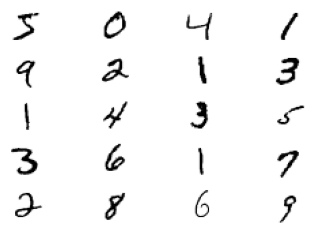

In [3]:
from matplotlib import pyplot as plt

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')
    


In [4]:
xtrain.shape , xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
xtrain = xtrain.reshape(60000, 784)
xtest = xtest.reshape(10000, 784)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [7]:
xtrain.shape[1]

784

In [33]:
def create_model(x_train):
  model = Sequential()
  model.add(Dense(10, input_dim = x_train.shape[1],
                  activation = 'tanh'))
  model.add(Dense(50, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(optimizer = sgd ,
                loss = 'categorical_crossentropy', 
                metrics=['accuracy'])

  return model

In [34]:
model = create_model(xtrain)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                550       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 60)                3060      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                610       
Total params: 12,070
Trainable params: 12,070
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
ytrain_ohe = to_categorical(ytrain)

In [36]:
history = model.fit(xtrain,
          ytrain_ohe,
          nb_epoch = 50,
          batch_size = 500,
          validation_split = 0.1,
          verbose = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 31us/sample - loss: 2.2058 - acc: 0.1964 - val_loss: 1.9447 - val_acc: 0.4127
Epoch 2/50
54000/54000 [==============================] - 2s 36us/sample - loss: 1.8673 - acc: 0.3870 - val_loss: 1.5895 - val_acc: 0.5772
Epoch 3/50
54000/54000 [==============================] - 2s 35us/sample - loss: 1.5657 - acc: 0.5149 - val_loss: 1.3006 - val_acc: 0.6392
Epoch 4/50
54000/54000 [==============================] - 2s 33us/sample - loss: 1.3352 - acc: 0.5863 - val_loss: 1.0748 - val_acc: 0.7060
Epoch 5/50
54000/54000 [==============================] - 2s 35us/sample - loss: 1.1746 - acc: 0.6389 - val_loss: 0.9267 - val_acc: 0.7488
Epoch 6/50
54000/54000 [==============================] - 2s 36us/sample - loss: 1.0577 - acc: 0.6776 - val_loss: 0.8233 - val_acc: 0.7772
Epoch 7/50
54000/54000 [==============================] - 2s 29us/sample - loss: 0.9767 - acc: 0.7047 - val_loss: 0.8

In [37]:
ytest_ohe = to_categorical(ytest)
score = model.evaluate(xtest, ytest_ohe, batch_size=500)
print(score)

60000/60000 [==============================] - 1s 23us/sample - loss: 0.4365 - acc: 0.8745
[0.43652963588635124, 0.87448335]


In [38]:
print(model.predict(xtest[:10]))

[[1.29411113e-03 9.19519400e-04 5.38004423e-03 4.35145289e-01
  1.19602766e-04 4.92916584e-01 1.26306782e-04 1.27277570e-03
  5.94443753e-02 3.38145555e-03]
 [9.89348650e-01 1.05138781e-04 3.30620183e-04 5.37160493e-04
  1.50886408e-04 6.35435153e-03 1.68401829e-03 2.45152361e-04
  8.06691882e-04 4.37347335e-04]
 [1.39666931e-03 1.56928331e-01 6.04914129e-02 7.36676380e-02
  3.63484204e-01 1.14839347e-02 4.78795823e-03 4.18117866e-02
  5.35862446e-02 2.32361794e-01]
 [6.82478349e-05 9.93066549e-01 2.30129948e-03 1.26632454e-03
  1.29735010e-04 1.52055625e-04 6.45678883e-05 6.82725746e-04
  2.02221796e-03 2.46313110e-04]
 [9.96662202e-05 1.53521745e-04 6.17085723e-04 8.25685449e-04
  2.15481482e-02 7.23003293e-04 1.27416453e-04 4.18578321e-03
  2.55545275e-03 9.69164252e-01]
 [8.78187071e-04 1.81452595e-02 9.18173850e-01 2.44733598e-02
  1.63486533e-04 4.68292693e-03 1.56182155e-03 4.99162648e-04
  3.06470208e-02 7.74895714e-04]
 [6.82478349e-05 9.93066549e-01 2.30129948e-03 1.26632454e

In [39]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Text(0.5, 0, 'epoch')

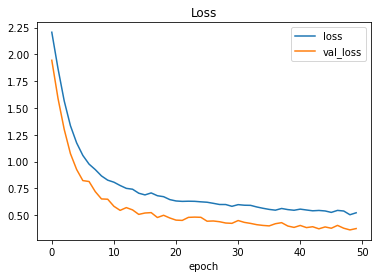

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

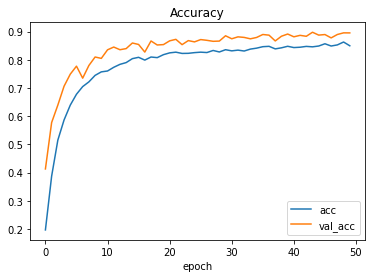

In [41]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [42]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

In [44]:
# serialize model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
